In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image


In [2]:
#Image(filename =r'Statistics.png', width = 1000, height = 300)

In [3]:
# Loading the dataset:
df3 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA19.20231004T131056.csv')

In [4]:
# Displaying first 5 rows:
df3.head()

,STATISTIC Label,Year,Sex,Education Level,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Net migration,Thousand,-9.7
1,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Emigrants: All destinations,Thousand,31.6
2,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Immigrants: All origins,Thousand,21.9
3,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Net migration,Thousand,-0.2
4,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Emigrants: All destinations,Thousand,6.7


In [5]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 

In [6]:
# Renaming the columns
df3 = df3.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow':'Inward_or_Outward_Flow'})

In [7]:
# Dropping rows based on criteria
df3 = df3[~((df3['Sex'] == 'Both sexes') | (df3['Inward_or_Outward_Flow'] == 'Net migration') | (df3['Education_Level'] == 'All persons'))]

df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [8]:
# Display the modified DataFrame
df3



,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18600.0
17,2009,Male,Higher secondary and below,Immigrants: All origins,11700.0
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0
20,2009,Male,Post leaving cert,Immigrants: All origins,2900.0
22,2009,Male,Third level,Emigrants: All destinations,13600.0
...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1200.0
622,2022,Female,Third level,Emigrants: All destinations,14400.0
623,2022,Female,Third level,Immigrants: All origins,40300.0
625,2022,Female,Not stated,Emigrants: All destinations,1300.0


In [9]:
# Looking up distinct values within the df:
def df3_distinct(df3):
    for column in df3:
        unique_values = df3[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Calling the function.
df3_distinct(df3)

Unique values for Year:
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Unique values for Sex:
['Male' 'Female']


Unique values for Education_Level:
['Higher secondary and below' 'Post leaving cert' 'Third level'
 'Not stated']


Unique values for Inward_or_Outward_Flow:
['Emigrants: All destinations' 'Immigrants: All origins']


Unique values for VALUE:
[18600. 11700.  5100.  2900. 13600. 16200.  3600.  3700. 13000. 10200.
  1600. 10800.  3400.  4600. 15500.  7300.  5700.  1800. 14700.  8400.
  1400. 11200.  7700.  1500.   700. 13200. 11100.  1700. 15700.  8900.
  4000. 17400. 10000.  2200.  1100. 14400.  2400. 18400. 12400. 15600.
  9700.  5000.  2300. 11800.  1000. 12500.  6500. 16600. 16400.  2000.
 16000.  9400.  1200. 14500. 17200.  7800. 15400. 14800.   800. 13400.
  7600.  3000.  2100.  2600.  2500. 10100.  7500. 19100.  3100.  3300.
 10700.  9000.   900. 16800.  3900.  8700. 20400.  1900.  4700.  5200.
 19600.  9300. 22800.  4300.  9200.  2700. 13900

# Binomial Distribution with n subsetting and increasing n.

We are going to model the Binomial Distribution for Males that have Post leaving cert education, we will be considering all year range


In [10]:
# Calculate the total sum of all values
total_sum = df3['VALUE'].sum()

# Calculate the probability for each row and store it in a new column 'Probability'
df3['Probability'] = df3['VALUE'] / total_sum

In [11]:
df3

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE,Probability
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18600.0,0.010452
17,2009,Male,Higher secondary and below,Immigrants: All origins,11700.0,0.006575
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0,0.002866
20,2009,Male,Post leaving cert,Immigrants: All origins,2900.0,0.001630
22,2009,Male,Third level,Emigrants: All destinations,13600.0,0.007643
...,...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1200.0,0.000674
622,2022,Female,Third level,Emigrants: All destinations,14400.0,0.008092
623,2022,Female,Third level,Immigrants: All origins,40300.0,0.022647
625,2022,Female,Not stated,Emigrants: All destinations,1300.0,0.000731


In [12]:
df3.Probability.sum()

0.9999999999999998

In [13]:
subset_df3 = df3[(df3['Sex'] == 'Male') & (df3['Education_Level'] == 'Post leaving cert') &(df3['Inward_or_Outward_Flow'] == 'Emigrants: All destinations')]
                
               

In [14]:
subset_df3 

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE,Probability
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0,0.002866
64,2010,Male,Post leaving cert,Emigrants: All destinations,5700.0,0.003203
109,2011,Male,Post leaving cert,Emigrants: All destinations,4000.0,0.002248
154,2012,Male,Post leaving cert,Emigrants: All destinations,5000.0,0.002810
199,2013,Male,Post leaving cert,Emigrants: All destinations,3700.0,0.002079
244,2014,Male,Post leaving cert,Emigrants: All destinations,3000.0,0.001686
289,2015,Male,Post leaving cert,Emigrants: All destinations,2400.0,0.001349
334,2016,Male,Post leaving cert,Emigrants: All destinations,1900.0,0.001068
379,2017,Male,Post leaving cert,Emigrants: All destinations,1700.0,0.000955
424,2018,Male,Post leaving cert,Emigrants: All destinations,2100.0,0.001180


In [15]:
#Finding the probability from 2009 to 2022 for Male Emigrants that have Post leaving cert:
p=subset_df3.Probability.sum()
print(p)

0.02304017982579376


In [16]:
n  = len(subset_df3['Year'])
print(n)

14


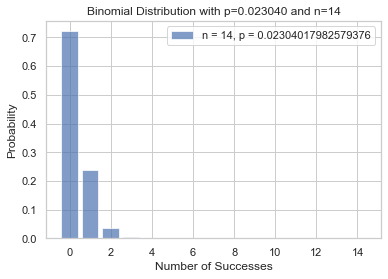

In [17]:
# Parameters for the Binomial distribution
p    # Probability of success
n   # Number of trials

# Generating the x values
x = np.arange(0, n + 1)

# Binomial distribution for the given parameters
y = binom.pmf(x, n, p)

# Plotting
sns.set(style="whitegrid")
plt.bar(x, y, alpha=0.7, align='center', label=f'n = {n}, p = {p}')
plt.title('Binomial Distribution with p=0.023040 and n=14')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [18]:
n2=600

Incrementing n from 16 to 600 to see how the Binomial distribution evolves:

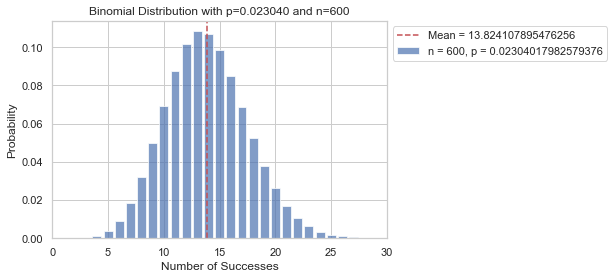

In [19]:


# Parameters for the Binomial distribution
p    # Probability of success
n2   # Number of trials

# x values
x = np.arange(0, n2 + 1)

# Binomial distribution
y = binom.pmf(x, n2, p)

# Plotting
plt.bar(x, y, alpha=0.7, align='center', label=f'n = {n2}, p = {p}')
plt.title('Binomial Distribution with p=0.023040 and n=600')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
# Limits x-axis
plt.xlim(0, 30) 
# mean line
mean = n2 * p
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean = {mean}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


We can clearly see:
    
The Central Limit Theorem says that as n increases, the binomial distribution with n trials and probability p of success gets closer and closer to a normal distribution. That is, the binomial probability of any event gets closer and closer to the normal probability of the same event. The normal distribution has the same mean μ = np and standard deviation  as the binomial distribution.

# Poisson Distribution:

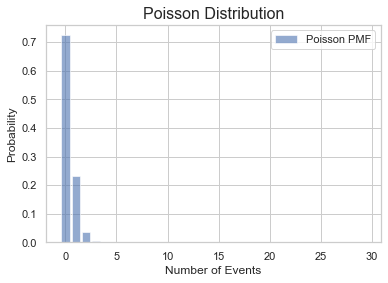

In [20]:
# Parameters
p = 0.02304017982579376  # rate parameter for Poisson distribution
n = 14  # number of events

# Poisson distribution
x = np.arange(0, 30)
poisson_values = poisson.pmf(x, p * n)

# Plotting
plt.bar(x, poisson_values, alpha=0.6, label='Poisson PMF', color='b')

# Set the title and labels
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.show()

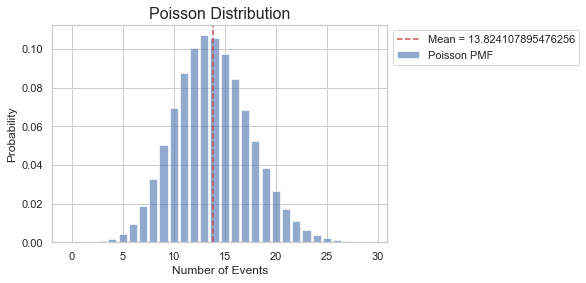

In [21]:
# Parameters
p = 0.02304017982579376  # rate parameter for Poisson distribution
n2 = 600  # number of events

#Poisson distribution
x = np.arange(0, 30)
poisson_values = poisson.pmf(x, p * n2)

# Plotting
plt.bar(x, poisson_values, alpha=0.6, label='Poisson PMF', color='b')
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Probability', fontsize=12)
mean = n2 * p
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean = {mean}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Normal distribution

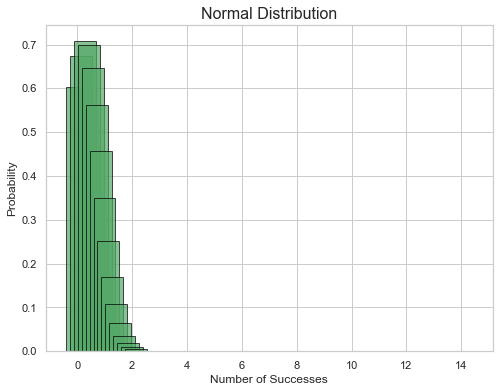

In [22]:
# Parameters
n = 14
p = 0.02304017982579376

# x-axis values
x = np.linspace(0, n, 100)

# mean and standard deviation for normal distribution
mean_normal = n * p
std_dev_normal = np.sqrt(n * p * (1 - p))
normal_values = norm.pdf(x, mean_normal, std_dev_normal)
plt.figure(figsize=(8, 6))
plt.bar(x, normal_values, alpha=0.7, color='g', edgecolor='black')
plt.title('Normal Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


# sumary of Binomial, Poison and Normal distributions.

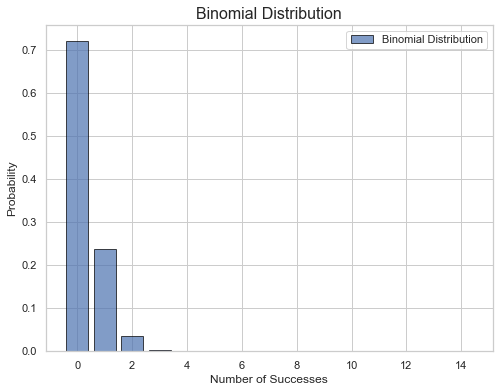

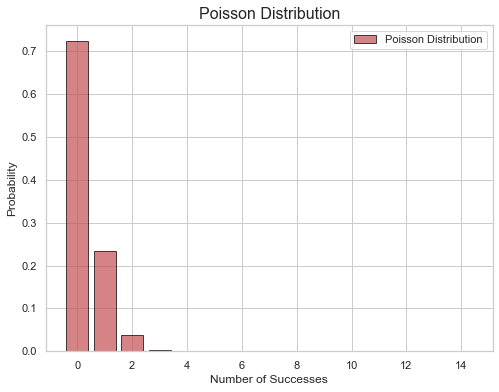

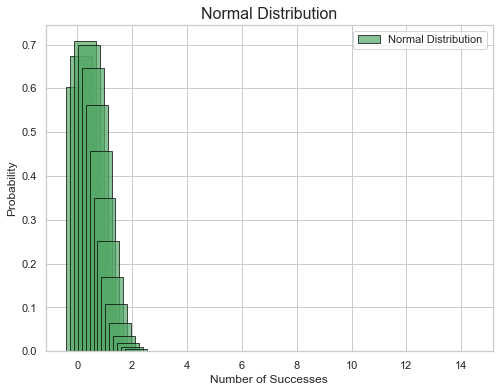

In [23]:
# Parameters
n = 14
p = 0.02304017982579376

# x-axis values
x = np.arange(0, n + 1)

# Binomial distribution
binomial_values = binom.pmf(x, n, p)
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_values, label='Binomial Distribution', alpha=0.7, color='b', edgecolor='black')
plt.title('Binomial Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.show()

# Poisson distribution
lambda_poisson = n * p
poisson_values = poisson.pmf(x, lambda_poisson)
plt.figure(figsize=(8, 6))
plt.bar(x, poisson_values, label='Poisson Distribution', alpha=0.7, color='r', edgecolor='black')
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.show()

#Normal Distribution
x = np.linspace(0, n, 100)
mean_normal = n * p
std_dev_normal = np.sqrt(n * p * (1 - p))
normal_values = norm.pdf(x, mean_normal, std_dev_normal)

plt.figure(figsize=(8, 6))
plt.bar(x, normal_values, label='Normal Distribution', alpha=0.7, color='g', edgecolor='black')
plt.title('Normal Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.show()
